2022-2024 open-meteo historical weather data for 4 NL locations



In [1]:
!pip install seaborn

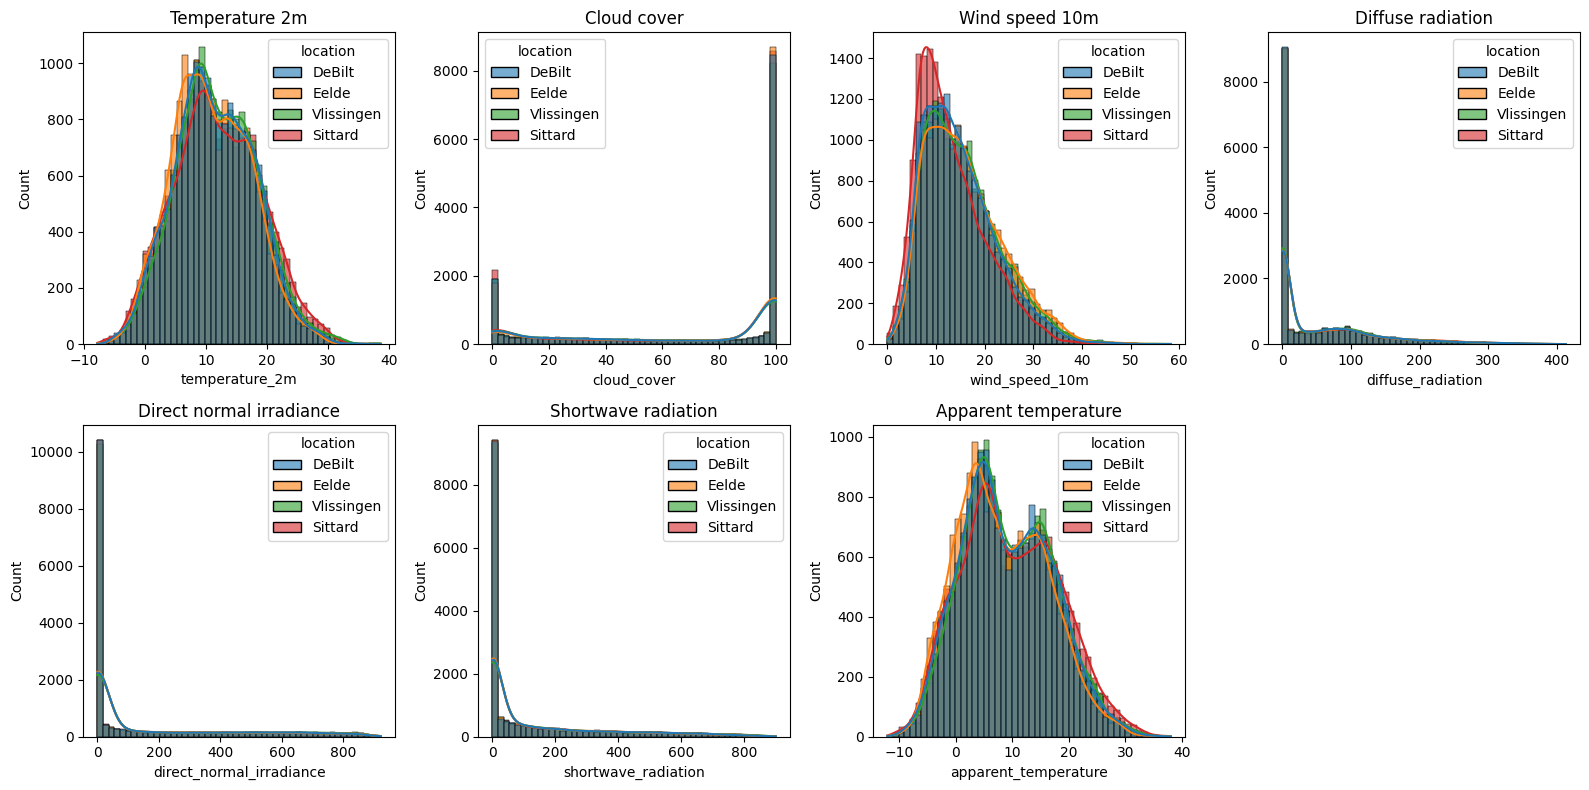

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (update file path if needed)
df = pd.read_csv("../Data/hist_weather_data_2022-2024_2025-03-12T10-19-27+00-00.csv")

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter the dataframe to include only 2022 and 2023 data
df = df[df['date'].dt.year.isin([2022, 2023])]

# Define the features to plot
features = [
    "temperature_2m", "cloud_cover", "wind_speed_10m", 
    "diffuse_radiation", "direct_normal_irradiance", 
    "shortwave_radiation", "apparent_temperature"
]

# Set up the plot grid
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()

# Plot histograms with KDE for each feature
for i, feature in enumerate(features):
    ax = axes[i]
    sns.histplot(df, x=feature, hue="location", kde=True, bins=50, alpha=0.6, ax=ax)
    ax.set_title(feature.replace("_", " ").capitalize())

# Remove the last empty subplot if number of features is less than grid size
if len(features) < len(axes):
    fig.delaxes(axes[-1])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

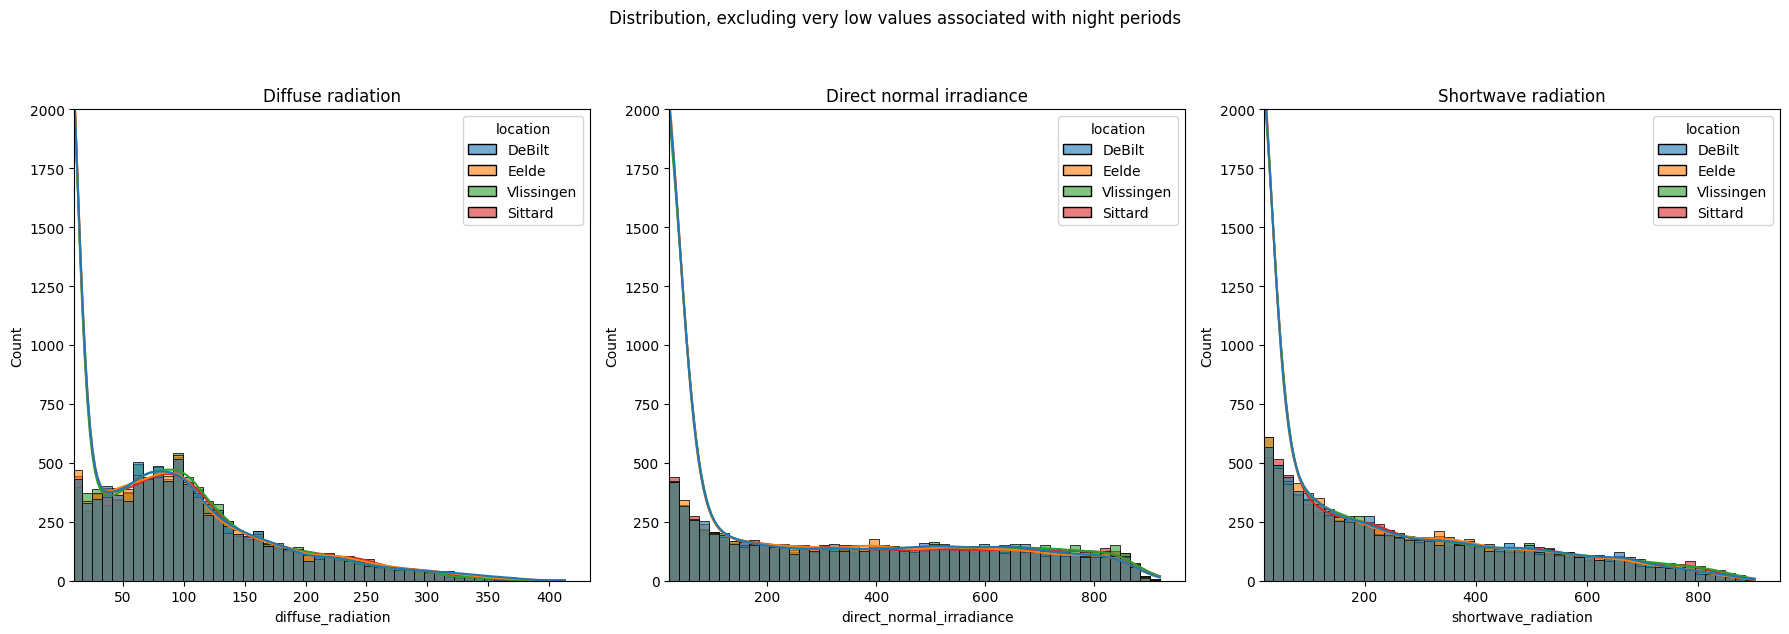

In [3]:
# Set up the plot grid
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
axes = axes.flatten()

# Define the features and their respective x-axis minimum values
features_with_limits = {
    "diffuse_radiation": 10,
    "direct_normal_irradiance": 20,
    "shortwave_radiation": 20
}

# Plot histograms with KDE for each feature with adjusted x-axis limits
for i, (feature, x_min) in enumerate(features_with_limits.items()):
    ax = axes[i]
    sns.histplot(df, x=feature, hue="location", kde=True, bins=50, alpha=0.6, ax=ax)
    ax.set_title(feature.replace("_", " ").capitalize())
    ax.set_xlim(left=x_min)
    ax.set_ylim(0, 2000)  # Set y-axis range

# Add the main title
fig.suptitle("Distribution, excluding very low values associated with night periods", y=1.05)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [30]:
df_2023

,date,temperature_2m,cloud_cover,wind_speed_10m,diffuse_radiation,direct_normal_irradiance,shortwave_radiation,apparent_temperature,location,year,month
8760,2023-01-01 00:00:00+00:00,15.606501,100.0,37.427883,0.0,0.0,0.0,9.357737,DeBilt,2023,1
8761,2023-01-01 01:00:00+00:00,14.756500,100.0,34.126022,0.0,0.0,0.0,8.965754,DeBilt,2023,1
8762,2023-01-01 02:00:00+00:00,14.206500,100.0,31.826931,0.0,0.0,0.0,8.739346,DeBilt,2023,1
8763,2023-01-01 03:00:00+00:00,13.906500,100.0,31.319998,0.0,0.0,0.0,8.755642,DeBilt,2023,1
8764,2023-01-01 04:00:00+00:00,13.706500,100.0,33.464510,0.0,0.0,0.0,8.434486,DeBilt,2023,1
...,...,...,...,...,...,...,...,...,...,...,...
96427,2023-12-31 19:00:00+00:00,8.882501,96.0,32.856780,0.0,0.0,0.0,2.436247,Sittard,2023,12
96428,2023-12-31 20:00:00+00:00,8.282500,99.0,33.651817,0.0,0.0,0.0,1.720268,Sittard,2023,12
96429,2023-12-31 21:00:00+00:00,7.732500,100.0,32.265720,0.0,0.0,0.0,1.456329,Sittard,2023,12
96430,2023-12-31 22:00:00+00:00,8.282500,98.0,32.271744,0.0,0.0,0.0,2.043579,Sittard,2023,12


Index(['date', 'temperature_2m', 'cloud_cover', 'wind_speed_10m',
       'diffuse_radiation', 'direct_normal_irradiance', 'shortwave_radiation',
       'apparent_temperature', 'location', 'year', 'month', 'day'],
      dtype='object')


/var/folders/6_/0hk4r2517rd0g1wg9893jqz40000gp/T/ipykernel_78477/2141465790.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['daily_max_temp'] = df_2023.groupby(['year', 'month', 'day'])['temperature_2m'].transform('max')
/var/folders/6_/0hk4r2517rd0g1wg9893jqz40000gp/T/ipykernel_78477/2141465790.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['daily_min_temp'] = df_2023.groupby(['year', 'month', 'day'])['temperature_2m'].transform('min')


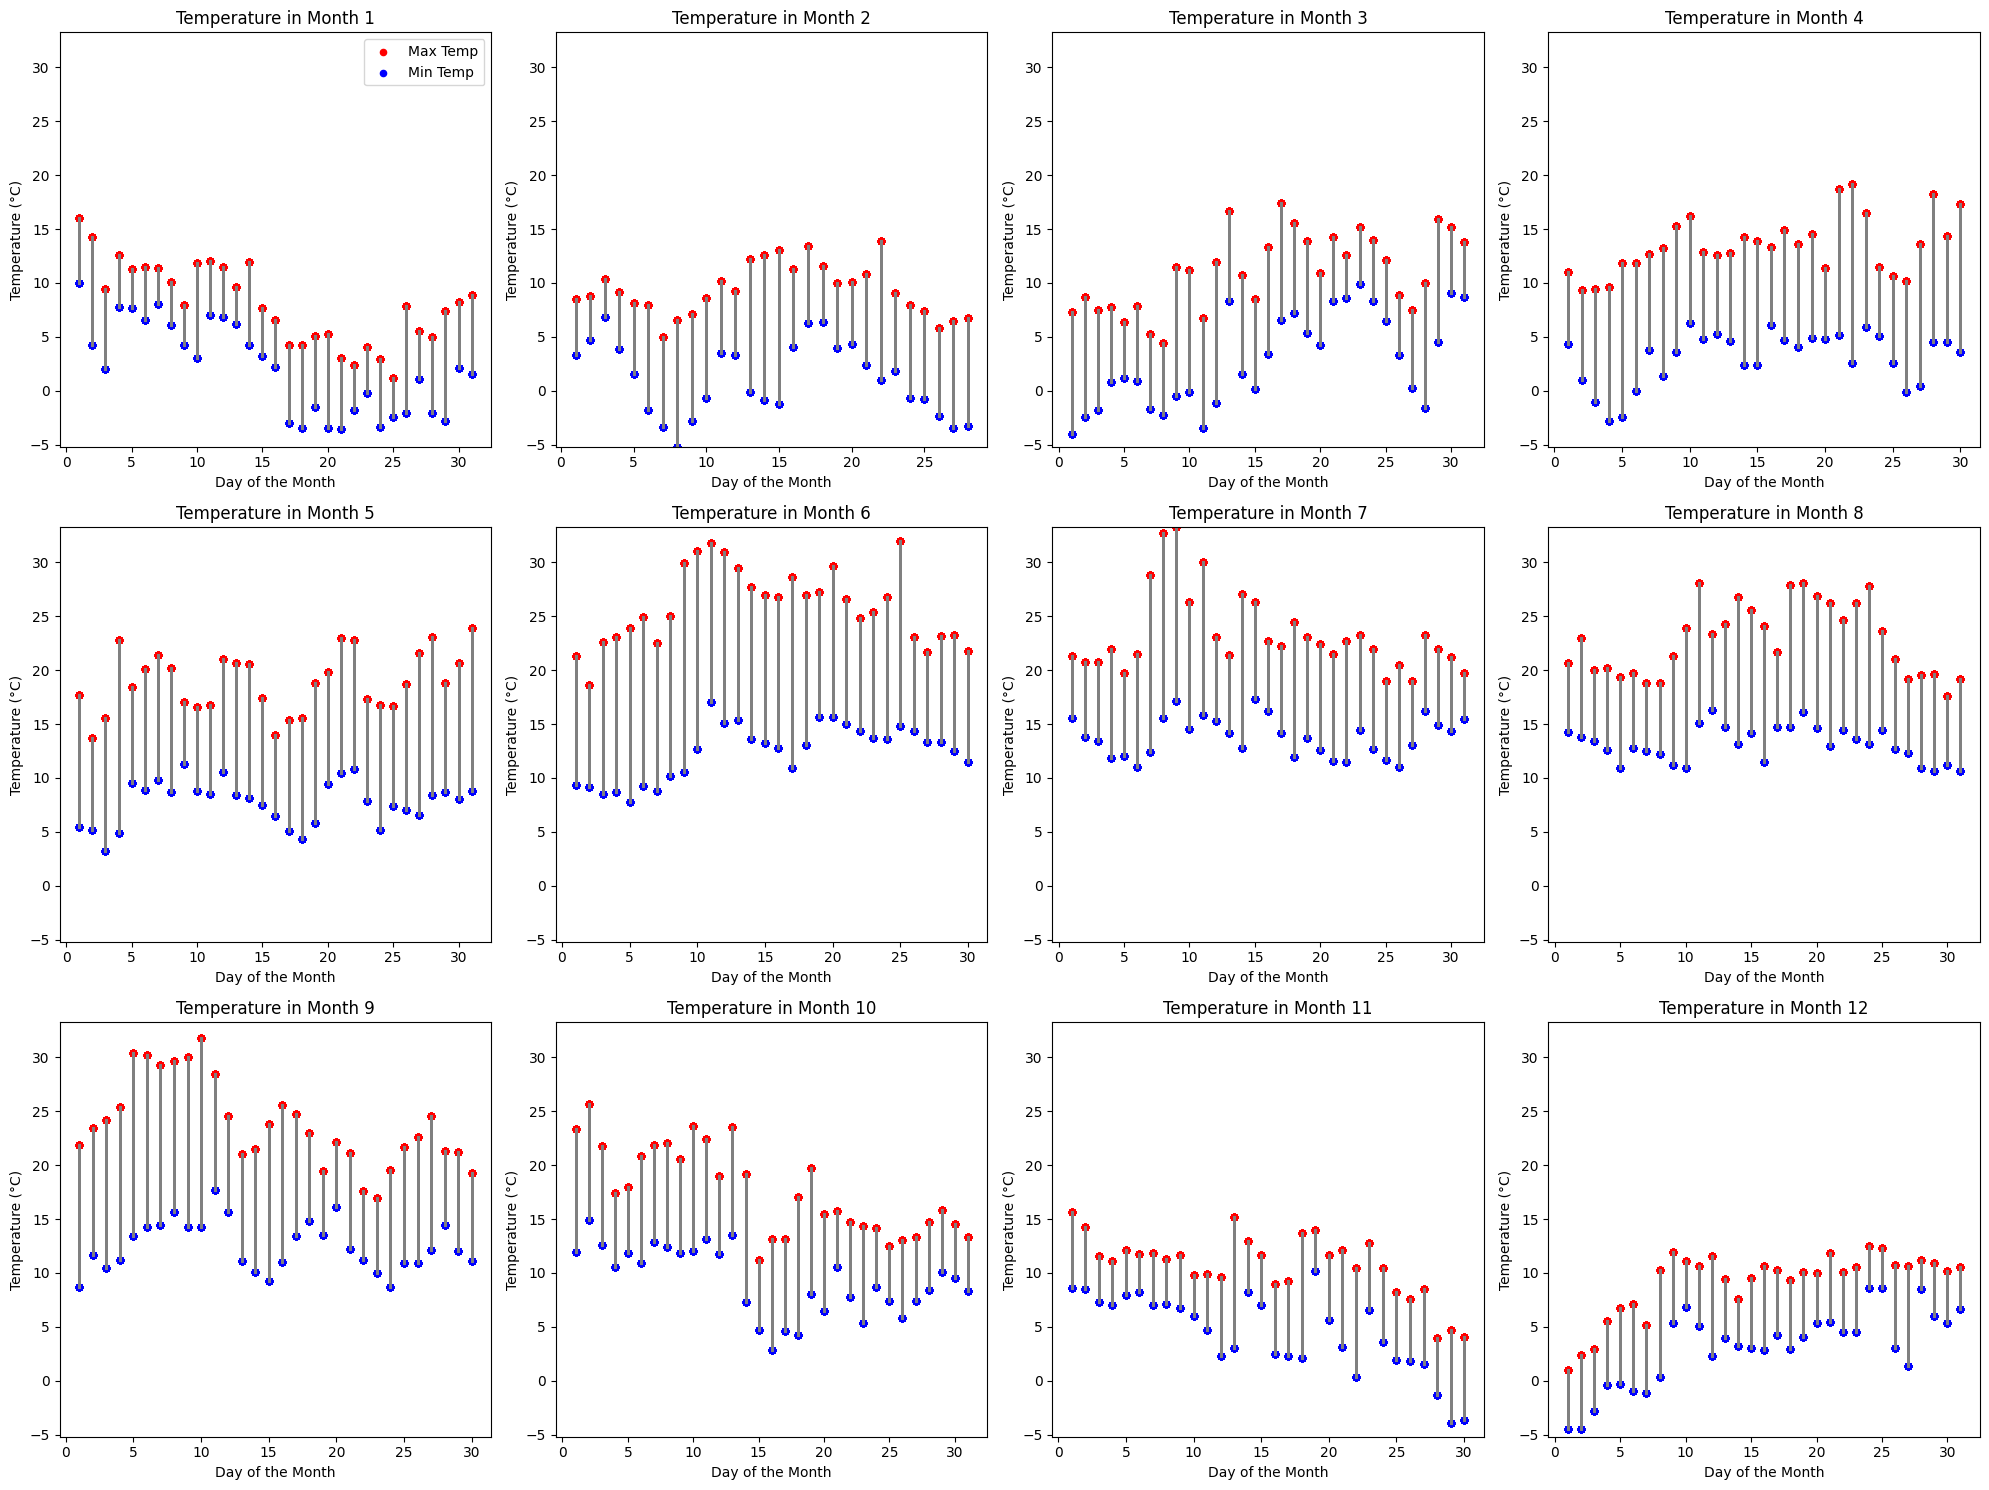

In [43]:
# Filter the dataframe for the year 2023
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df_2023 = df[df['year'] == 2023]
df_2023

# Set up the plot grid
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axes = axes.flatten()  # Flatten the axes array
# Ensure the 'daily_min_temp' column exists in the dataframe
print(df_2023.columns)

# Define daily max and min temperatures
df_2023['daily_max_temp'] = df_2023.groupby(['year', 'month', 'day'])['temperature_2m'].transform('max')
df_2023['daily_min_temp'] = df_2023.groupby(['year', 'month', 'day'])['temperature_2m'].transform('min')


# Plot daily min and max temperatures for each month
for month in range(1, 13):
    ax = axes[month-1]
    df_month = df_2023[df_2023['month'] == month]
    
    # Plot vertical lines for min-max range
    for _, row in df_month.iterrows():
        ax.plot([row['day'], row['day']], [row['daily_min_temp'], row['daily_max_temp']], color='gray', linewidth=2)
    
    # Scatter points for min/max temps
    ax.scatter(df_month['day'], df_month['daily_max_temp'], color='red', label='Max Temp', s=20)
    ax.scatter(df_month['day'], df_month['daily_min_temp'], color='blue', label='Min Temp', s=20)
    
    ax.set_title(f'Temperature in Month {month}')
    ax.set_xlabel('Day of the Month')
    ax.set_ylabel('Temperature (°C)')
    ax.set_ylim(global_min_temp, global_max_temp)

    # Show legend only for the first subplot
    if month == 1:
        ax.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [32]:
import nbformat

print(nbformat.__version__)

5.10.4


In [44]:
import plotly.graph_objects as go
import pandas as pd

# Filter the dataframe for the year 2022
df_2022 = df[df['date'].dt.year == 2022]

# Create subplots for each month
fig = go.Figure()

# Plot daily min and max temperatures for each month
for month in range(1, 13):
    df_month = df_2022[df_2022['month'] == month]
    
    # Vertical lines for min-max range
    for _, row in df_month.iterrows():
        fig.add_trace(go.Scatter(
            x=[row['day'], row['day']],
            y=[row['daily_min_temp'], row['daily_max_temp']],
            mode='lines',
            line=dict(color='gray', width=2),
            showlegend=False
        ))
    
    # Scatter points for min/max temps
    fig.add_trace(go.Scatter(
        x=df_month['day'], y=df_month['daily_max_temp'],
        mode='markers', marker=dict(color='red', size=6),
        name=f'Max Temp (Month {month})'
    ))
    
    fig.add_trace(go.Scatter(
        x=df_month['day'], y=df_month['daily_min_temp'],
        mode='markers', marker=dict(color='blue', size=6),
        name=f'Min Temp (Month {month})'
    ))

# Layout styling
fig.update_layout(
    title="Daily Temperature Ranges (2022)",
    xaxis_title="Day of the Month",
    yaxis_title="Temperature (°C)",
    template="plotly_dark",
    hovermode="x unified"
)

fig.show()

KeyError: 'daily_min_temp'

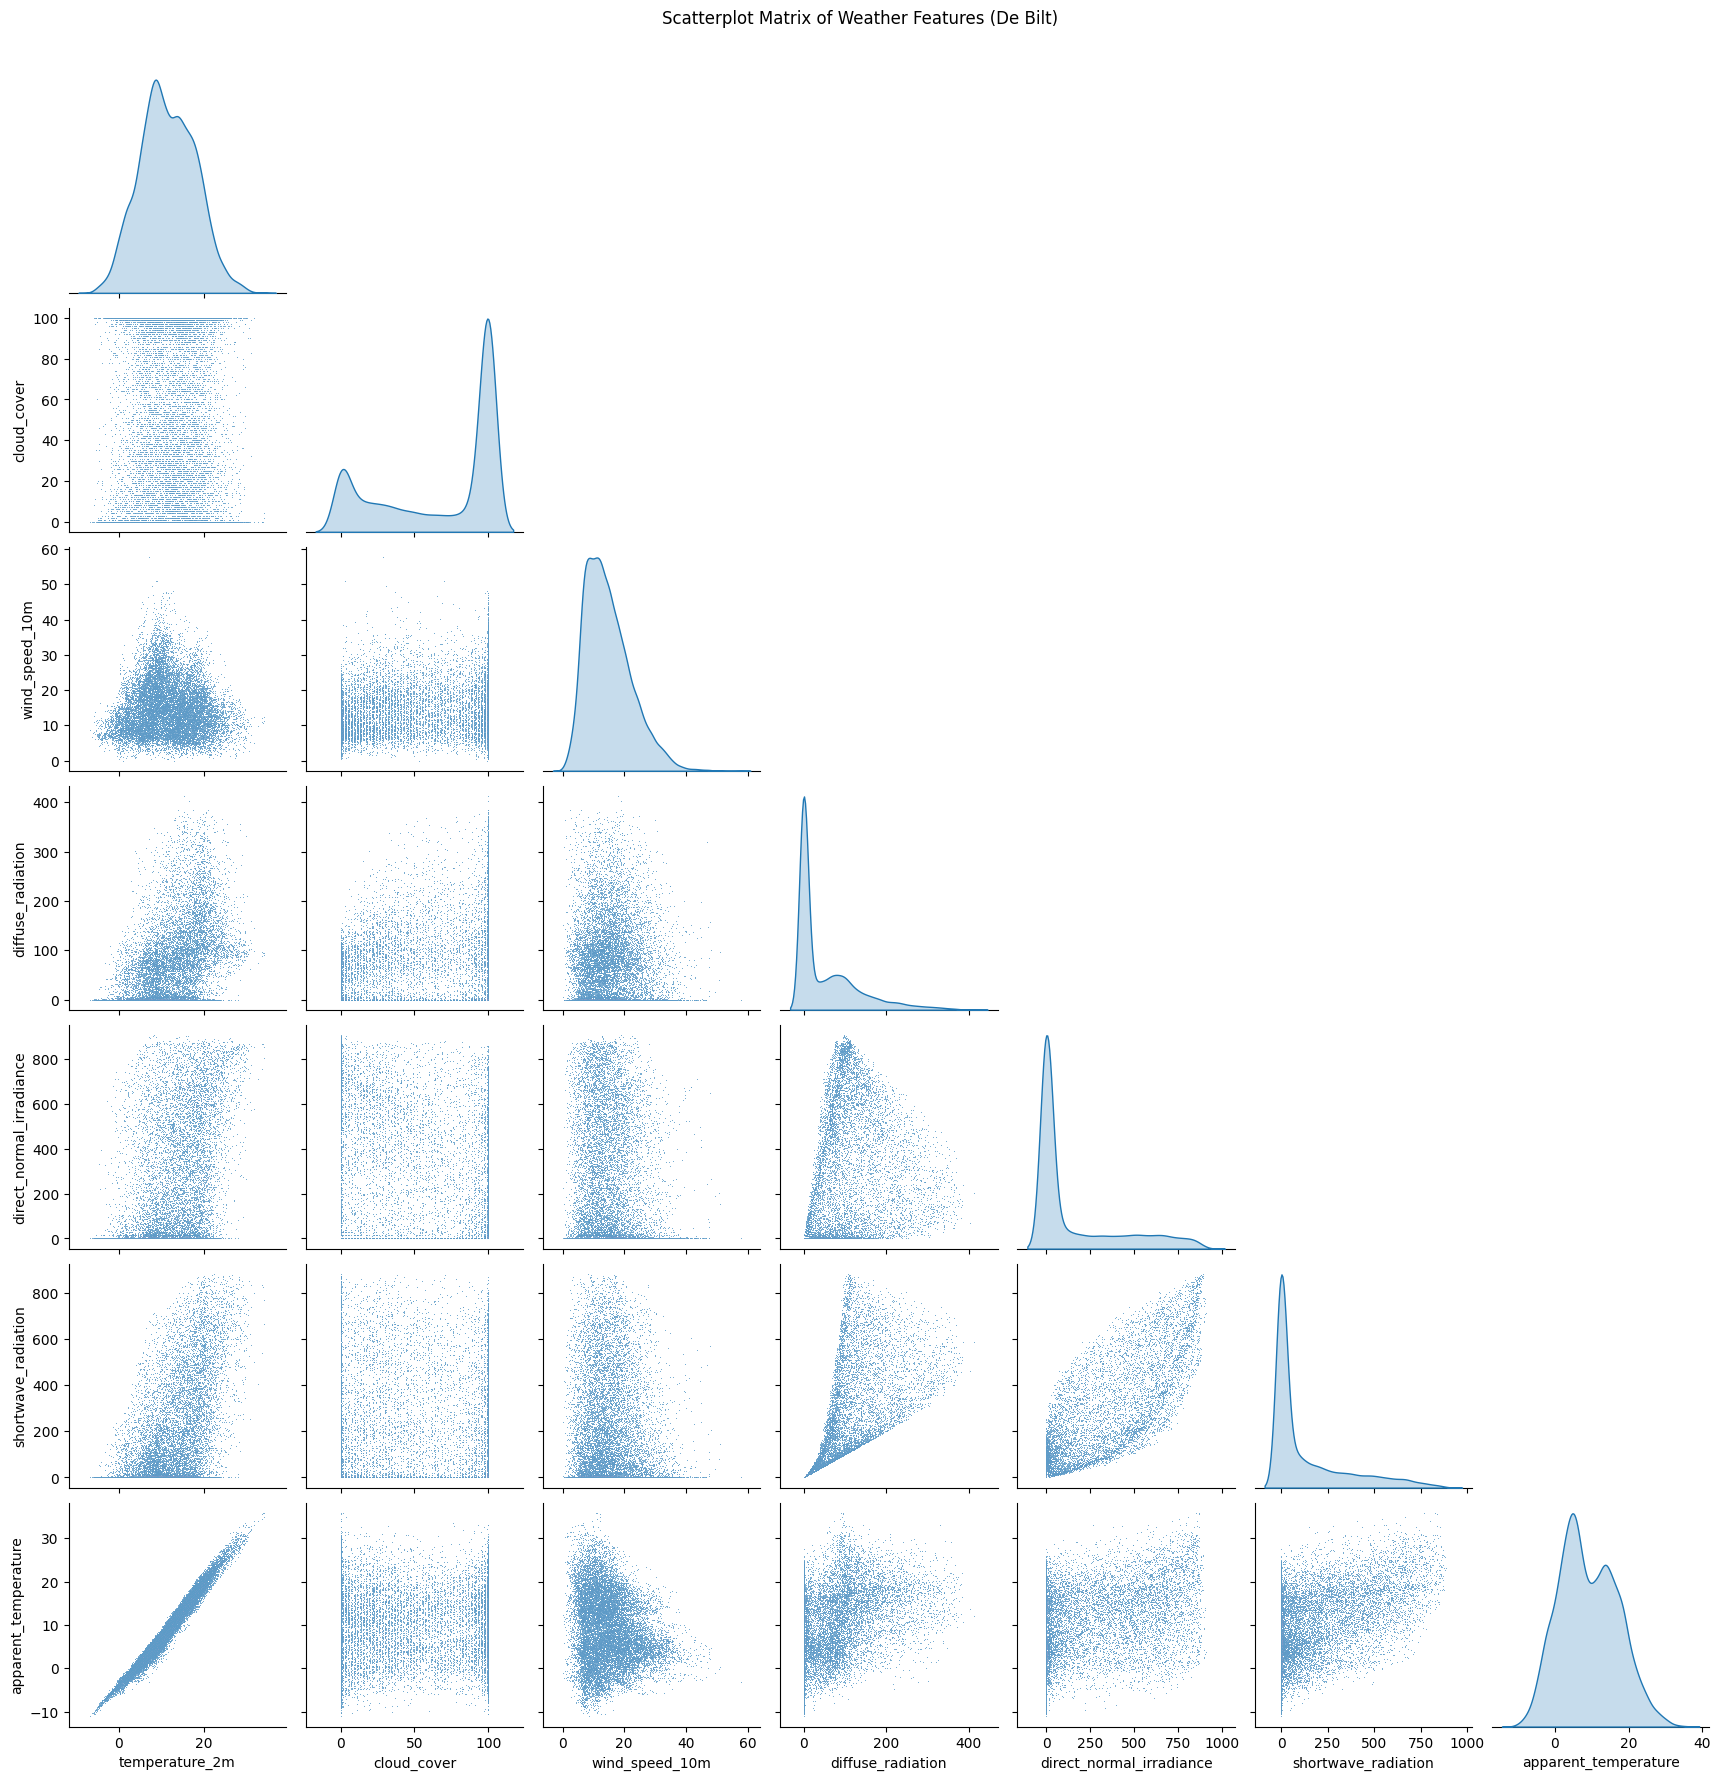

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Filter for De Bilt only
df_debilt = df[df["location"] == "DeBilt"]

# Select only numerical weather features
features = [
    "temperature_2m", "cloud_cover", "wind_speed_10m", 
    "diffuse_radiation", "direct_normal_irradiance", 
    "shortwave_radiation", "apparent_temperature"
]

# Pair plot with KDE on diagonal and reduced dot size
sns.pairplot(df_debilt[features], diag_kind="kde", corner=True, plot_kws={'s': 0.5})

# Show the plot
plt.suptitle("Scatterplot Matrix of Weather Features (De Bilt)", y=1.02)
plt.show()

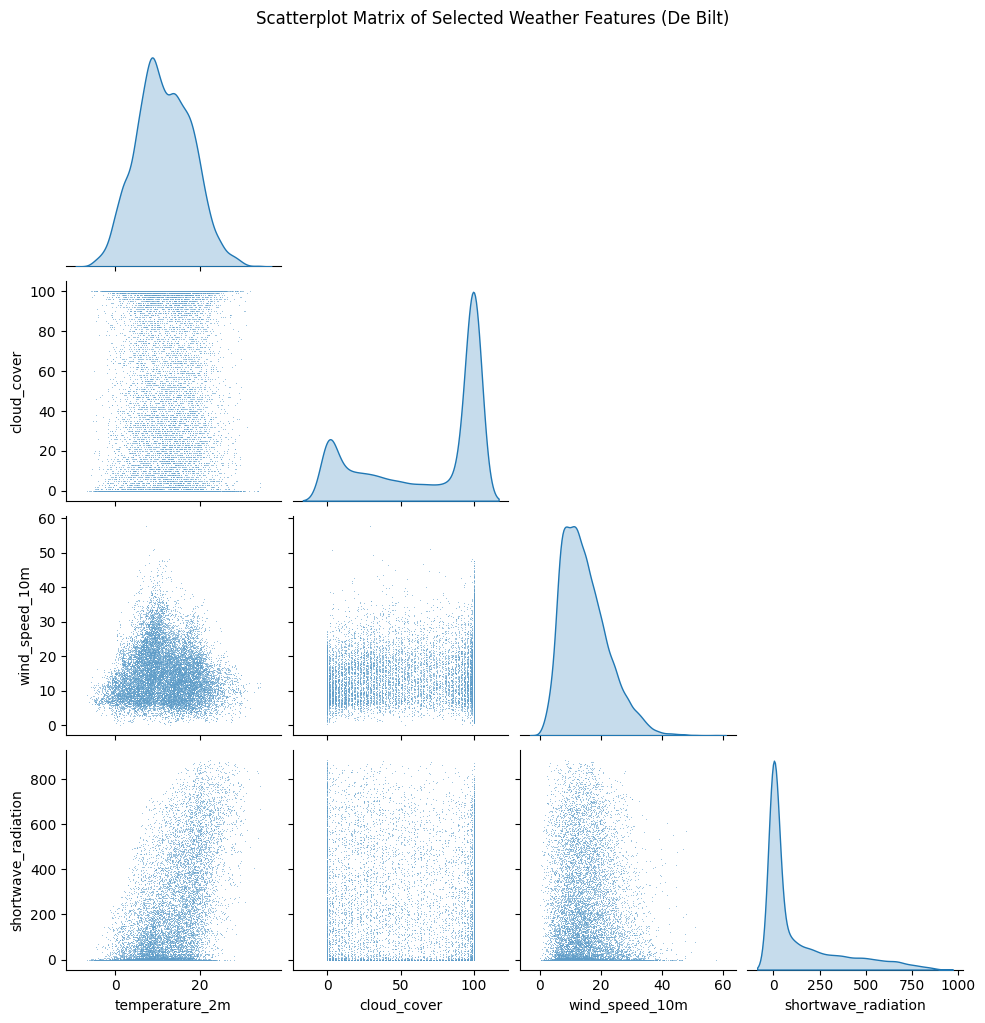

In [5]:
# Filter out the unwanted features, for better readability
filtered_features = [feature for feature in features if feature not in ["apparent_temperature", "diffuse_radiation", "direct_normal_irradiance"]]

# Pair plot with KDE on diagonal and reduced dot size. 
sns.pairplot(df_debilt[filtered_features], diag_kind="kde", corner=True, plot_kws={'s': 1/3})

# Show the plot
plt.suptitle("Scatterplot Matrix of Selected Weather Features (De Bilt)", y=1.02)
plt.show()


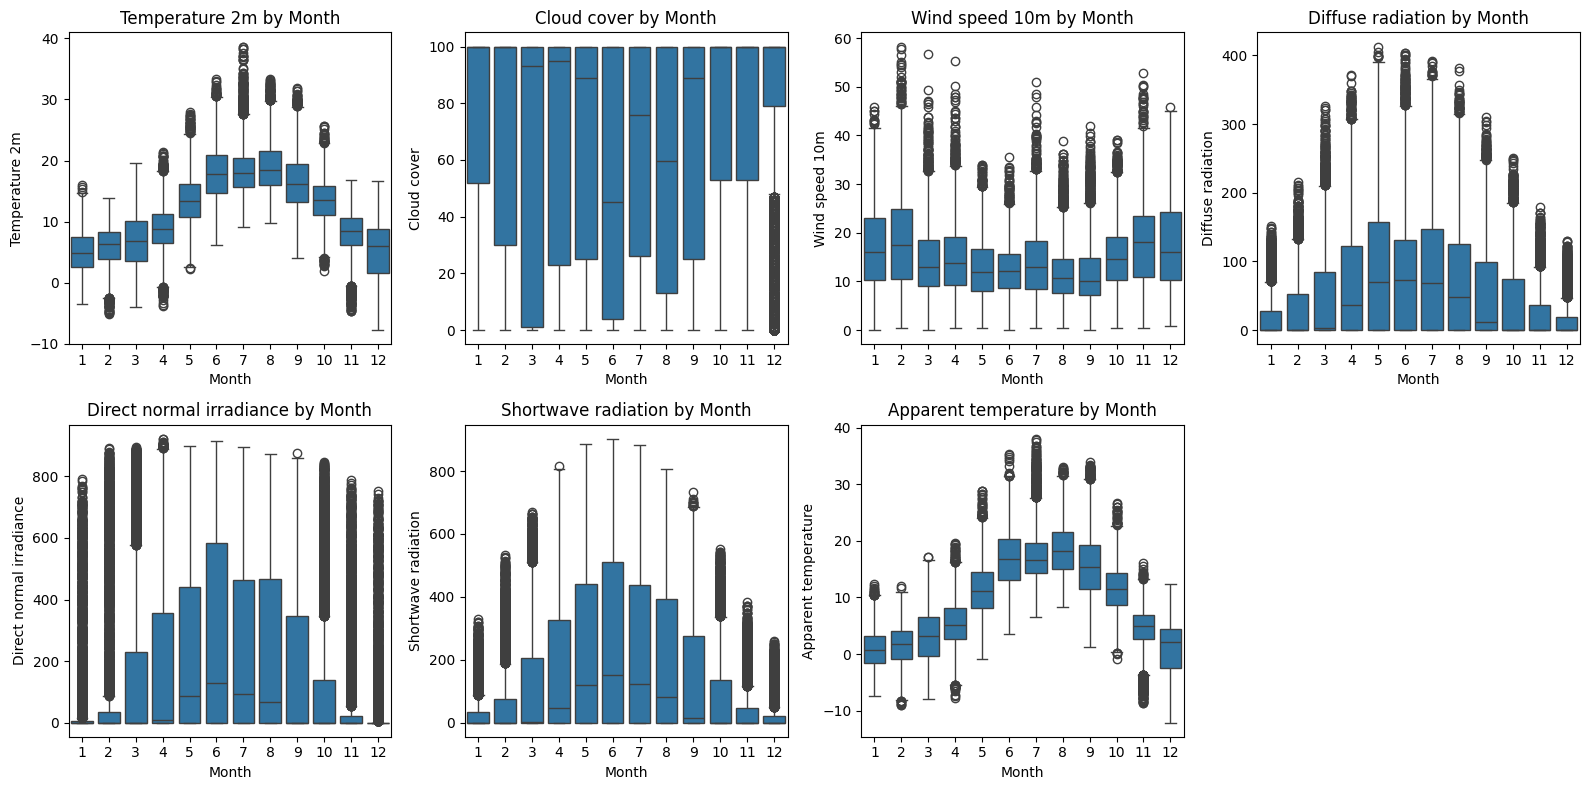

In [6]:
#boxplots per feature (average values) by month

# Extract the month from the datetime
df['month'] = df['date'].dt.month

# Set up the plot grid
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()

# Plot boxplots for each feature grouped by month
for i, feature in enumerate(features):
    ax = axes[i]
    sns.boxplot(data=df, x='month', y=feature, ax=ax)
    ax.set_title(f'{feature.replace("_", " ").capitalize()} by Month')
    ax.set_xlabel('Month')
    ax.set_ylabel(feature.replace("_", " ").capitalize())

# Remove the last empty subplot if number of features is less than grid size
if len(features) < len(axes):
    fig.delaxes(axes[-1])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()